# Import

In [1]:
import os
import numpy as np
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set
%matplotlib inline

# Load the dataset

Head
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
_____________________________________________________________________________
Shape
(3000, 2)
_____________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
review       3000 non-null object
sentiment    3000 non-null object
dtypes: object(2)
memory usage: 47.0+ KB
None


,review,sentiment
count,3000,3000
unique,3000,2
top,"Well, here's another terrific example of awkwa...",positive
freq,1,1508


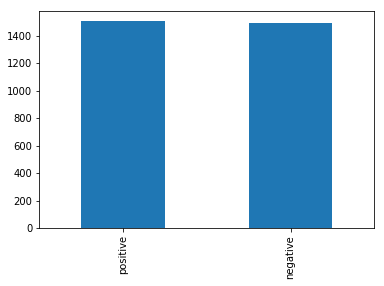

In [2]:
imdb_data=pd.read_csv('IMDBDataset.csv')

df_train=imdb_data[:3000]

print("Head")
print(df_train.head())
print("_____________________________________________________________________________")
print("Shape")
print(df_train.shape)
print("_____________________________________________________________________________")
print(df_train.info())

df_train['sentiment'].value_counts().plot(kind='bar');
df_train.describe()

The data is clean, there is no Naan values

# Preprocessing

## Tokenizing

Creation of a tokenize's function permitting to automatically tokenize our train and test set

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def tokenize(data):
    corpus = [word_tokenize(token) for token in data]
    lowercase_train = [[token.lower() for token in doc] for doc in corpus]
    alphas = [[token for token in doc if token.isalpha()] for doc in lowercase_train]
    stop_words = stopwords.words('english')
    train_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas]
    stemmer = PorterStemmer()
    stemmed = [[stemmer.stem(token) for token in doc] for doc in train_no_stop]
    train_clean_str = [ ' '.join(doc) for doc in stemmed]
    return train_clean_str

In [4]:
X_train=imdb_data.review[:3000]
y_train=imdb_data.sentiment[:3000]

X_train = tokenize(X_train)

X_test2=imdb_data.review[40000:45000]
y_test2=imdb_data.sentiment[40000:45000]

X_test2 = tokenize(X_test2)
y_test2 = y_test2.values.tolist()

X_train[1]

'wonder littl product br br film techniqu fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

# Machine Learning

## Preprocessing

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')

## Machine learning models

### MultinomialNB

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
pipe = Pipeline([('vectorizer', cvec), ('mnb', mnb)])

y_train=y_train.values.tolist()
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_pred, y_train)

print(cm)
print("Accuracy :" , accuracy)

cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()

cr = classification_report(y_train, y_pred)
print(cr, cv)

[[1475   17]
 [ 116 1392]]
Accuracy : 0.9556666666666667
              precision    recall  f1-score   support

    negative       0.93      0.99      0.96      1492
    positive       0.99      0.92      0.95      1508

   micro avg       0.96      0.96      0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000
 0.816719799055966


# Semi Supervised 

In [8]:
iterasi=1
acc_train=[]
acc_test=[]
acc_test2=[]

seed=1.10
data_total=len(X_train)
data_iter=int(seed*data_total)

In [9]:

print(data_total)
print(data_iter)


y_pred_fromtrain=pipe.predict(X_train)
cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_pred_fromtrain, y_train)
cm = confusion_matrix(y_train, y_pred_fromtrain)
accuracy = accuracy_score(y_pred_fromtrain, y_train)
acc_train.append(accuracy)
print("\nTrain Data=",len(X_train),len(y_train))
print("Predicton from train data model ke-",iterasi)
print("\nCross validation score:",cv,"\n",cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")


X_test=imdb_data.review[data_total:data_iter]
y_test=imdb_data.sentiment[data_total:data_iter]

pipe.fit(X_train,y_train)

print("Train Data=",len(X_train),len(y_train))
print("Test Data=",len(X_test),len(y_test))

y_test=y_test.values.tolist()
X_test=tokenize(X_test)
y_pred=pipe.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
acc_test.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





iterasi=iterasi+1


prob=pipe.predict_proba(X_test)
prob_sum=[]
for data in range (0,len(prob)):
    prob_sum.append(prob[data][0]-prob[data][1])

for data in range (0,len(X_test)) :
    
    if (abs(prob_sum[data])) > 0.99 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append(y)
        
print(len(X_train),len(y_train))

data_total=data_iter
data_iter=int(seed*data_total)

3000
3300

Train Data= 3000 3000
Predicton from train data model ke- 1

Cross validation score: 0.816719799055966 
               precision    recall  f1-score   support

    negative       0.99      0.93      0.96      1591
    positive       0.92      0.99      0.95      1409

   micro avg       0.96      0.96      0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000


Confusion Matrix : 
 [[1475   17]
 [ 116 1392]]
Accuracy : 0.9556666666666667
__________________________________________________________________________________________________
Train Data= 3000 3000
Test Data= 300 300
prediction from test data, model ke- 1
              precision    recall  f1-score   support

    negative       0.83      0.86      0.84       155
    positive       0.84      0.81      0.82       145

   micro avg       0.83      0.83      0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83    

In [10]:
while data_total < 10000 :

    print(data_total,data_iter,len(X_train))


    y_pred_fromtrain=pipe.predict(X_train)
    cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
    cr = classification_report(y_pred_fromtrain, y_train)
    cm = confusion_matrix(y_train, y_pred_fromtrain)
    accuracy = accuracy_score(y_pred_fromtrain, y_train)
    acc_train.append(accuracy)
    print("\nTrain Data=",len(X_train),len(y_train))
    print("Predicton from train data model ke-",iterasi)
    print("\nCross validation score:",cv,"\n",cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")


    X_test=imdb_data.review[data_total:data_iter]
    y_test=imdb_data.sentiment[data_total:data_iter]

    pipe.fit(X_train,y_train)

    print("Train Data=",len(X_train),len(y_train))
    print("Test Data=",len(X_test),len(y_test))

    y_test=y_test.values.tolist()
    X_test=tokenize(X_test)
    y_pred=pipe.predict(X_test)

    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_pred, y_test)
    acc_test.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")
    
    y_pred_fromtest2=pipe.predict(X_test2)
    cr = classification_report(y_test2, y_pred_fromtest2)
    cm = confusion_matrix(y_test2, y_pred_fromtest2)
    accuracy = accuracy_score(y_pred_fromtest2, y_test2)
    acc_test2.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")





    iterasi=iterasi+1


    prob=pipe.predict_proba(X_test)
    prob_sum=[]
    for data in range (0,len(prob)):
        prob_sum.append(prob[data][0]-prob[data][1])

    for data in range (0,len(X_test)) :
         if (data_total+data) < 10000:
                if (abs(prob_sum[data])) > 0.99 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append(y)

    print(len(X_train),len(y_train))
    
    data_total=data_iter
    data_iter=int(seed*data_total)

3300 3630 3208

Train Data= 3208 3208
Predicton from train data model ke- 2

Cross validation score: 0.8295930417439029 
               precision    recall  f1-score   support

    negative       0.99      0.93      0.96      1715
    positive       0.93      0.99      0.96      1493

   micro avg       0.96      0.96      0.96      3208
   macro avg       0.96      0.96      0.96      3208
weighted avg       0.96      0.96      0.96      3208


Confusion Matrix : 
 [[1599   17]
 [ 116 1476]]
Accuracy : 0.9585411471321695
__________________________________________________________________________________________________
Train Data= 3208 3208
Test Data= 330 330
prediction from test data, model ke- 2
              precision    recall  f1-score   support

    negative       0.77      0.89      0.82       166
    positive       0.87      0.73      0.79       164

   micro avg       0.81      0.81      0.81       330
   macro avg       0.82      0.81      0.81       330
weighted avg       0.

prediction from test data, model ke- 6
              precision    recall  f1-score   support

    negative       0.76      0.85      0.80      2463
    positive       0.84      0.74      0.79      2537

   micro avg       0.79      0.79      0.79      5000
   macro avg       0.80      0.80      0.79      5000
weighted avg       0.80      0.79      0.79      5000


Confusion Matrix : 
 [[2095  368]
 [ 659 1878]]
Accuracy : 0.7946
__________________________________________________________________________________________________
4664 4664
5314 5845 4664

Train Data= 4664 4664
Predicton from train data model ke- 7

Cross validation score: 0.8628996884436463 
               precision    recall  f1-score   support

    negative       0.99      0.92      0.95      2656
    positive       0.91      0.98      0.94      2008

   micro avg       0.95      0.95      0.95      4664
   macro avg       0.95      0.95      0.95      4664
weighted avg       0.95      0.95      0.95      4664


Confusio

prediction from test data, model ke- 11
              precision    recall  f1-score   support

    negative       0.71      0.84      0.77       368
    positive       0.83      0.69      0.75       409

   micro avg       0.76      0.76      0.76       777
   macro avg       0.77      0.76      0.76       777
weighted avg       0.77      0.76      0.76       777


Confusion Matrix : 
 [[310  58]
 [128 281]]
Accuracy : 0.7606177606177607
__________________________________________________________________________________________________
prediction from test data, model ke- 11
              precision    recall  f1-score   support

    negative       0.74      0.84      0.79      2463
    positive       0.83      0.71      0.76      2537

   micro avg       0.78      0.78      0.78      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.78      0.78      0.78      5000


Confusion Matrix : 
 [[2081  382]
 [ 734 1803]]
Accuracy : 0.7768
_________________________

# Test

In [11]:
import pprint
pp = pprint.PrettyPrinter()
    
prob=pipe.predict_proba(X_test)



prob_sum=[]
for data in range (0,len(prob)):
    prob_sum.append(prob[data][0]-prob[data][1])
    
pred=pipe.predict(X_test)

table=[]
result=[]

for i in range (0,len(X_test)) :
    if y_pred[i] == y_test[i] :
        result.append("true")

    else:
        result.append("false")
    
    table.append([result[i],pred[i],abs(prob_sum[i]),prob[i][0],prob[i][1]])

            
pp.pprint(table)
data_table=pd.DataFrame(table)
data_table
data_table.to_csv('prediction_naive_Bayes.csv')

[['true',
  'negative',
  0.9999995053968177,
  0.9999997526984167,
  2.473015989793488e-07],
 ['false',
  'negative',
  0.8682207702525852,
  0.9341103851262862,
  0.06588961487370101],
 ['true',
  'negative',
  0.9999999997208207,
  0.9999999998603926,
  1.395719232603502e-10],
 ['true', 'negative', 1.0, 1.0, 3.242452753500823e-24],
 ['true',
  'positive',
  0.9991135236842605,
  0.00044323815787173824,
  0.9995567618421323],
 ['false',
  'negative',
  0.9961583202611182,
  0.9980791601305679,
  0.0019208398694496522],
 ['false',
  'negative',
  0.7649962530684825,
  0.8824981265342524,
  0.1175018734657699],
 ['true', 'positive', 1.0, 1.3822937041962206e-20, 1.0],
 ['true',
  'positive',
  0.999997298985037,
  1.3505074764697965e-06,
  0.9999986494925135],
 ['true',
  'negative',
  0.9999999999899828,
  0.9999999999949978,
  5.014957493278289e-12],
 ['true',
  'negative',
  0.19542463331400417,
  0.5977123166569073,
  0.4022876833429031],
 ['true',
  'negative',
  0.9998764890113756

 ['false',
  'positive',
  0.9289140535595375,
  0.03554297322018144,
  0.9644570267797189],
 ['true',
  'positive',
  0.9998947040763098,
  5.264796182092063e-05,
  0.9999473520381307],
 ['true',
  'negative',
  0.9991153136375965,
  0.9995576568188175,
  0.00044234318122095284],
 ['false',
  'positive',
  0.9999852810220213,
  7.359488984241809e-06,
  0.9999926405110056],
 ['true',
  'positive',
  0.8344948872289151,
  0.08275255638554052,
  0.9172474436144555],
 ['true',
  'positive',
  0.9998374624850493,
  8.126875747674247e-05,
  0.9999187312425261],
 ['true',
  'positive',
  0.4926874312627768,
  0.25365628436861154,
  0.7463437156313883],
 ['true',
  'positive',
  0.9999999999753287,
  1.2336229392060978e-11,
  0.999999999987665],
 ['false',
  'negative',
  0.6695867777391579,
  0.8347933888695431,
  0.16520661113038523],
 ['true',
  'negative',
  0.999927605710475,
  0.9999638028552461,
  3.619714477111734e-05],
 ['true',
  'negative',
  0.9999985360714795,
  0.999999268035748

 ['true',
  'negative',
  0.999883442489436,
  0.9999417212447002,
  5.827875526416561e-05],
 ['true', 'positive', 1.0, 4.431816566663981e-36, 1.0],
 ['true',
  'negative',
  0.9996539152274172,
  0.9998269576137019,
  0.0001730423862846558],
 ['true',
  'positive',
  0.9999640237903605,
  1.7988104807145636e-05,
  0.9999820118951677],
 ['true', 'negative', 1.0, 1.0, 8.56035140457999e-26],
 ['true',
  'negative',
  0.9881185668677837,
  0.9940592834338768,
  0.0059407165660931415],
 ['true',
  'negative',
  0.8420432341377734,
  0.9210216170688797,
  0.07897838293110641],
 ['true',
  'negative',
  0.9999847904045587,
  0.9999923952022816,
  7.604797722894438e-06],
 ['true', 'negative', 1.0, 1.0, 4.163105016803822e-19],
 ['true', 'positive', 1.0, 1.765649667826184e-41, 1.0],
 ['true',
  'positive',
  0.9999999525635218,
  2.3718220944176415e-08,
  0.9999999762817428],
 ['true',
  'negative',
  0.9999989840917028,
  0.9999994920458601,
  5.07954157274603e-07],
 ['true',
  'positive',
  0

  0.998483603238867,
  0.9992418016194331,
  0.0007581983805660813],
 ['true',
  'positive',
  0.993836676771252,
  0.0030816616143644233,
  0.9969183383856164],
 ['true', 'negative', 1.0, 1.0, 4.418641140200218e-24],
 ['true',
  'positive',
  0.9999999999309159,
  3.4523291062426294e-11,
  0.9999999999654392],
 ['false',
  'negative',
  0.9993668837679874,
  0.9996834418839802,
  0.0003165581159927698],
 ['true', 'negative', 1.0, 1.0, 1.815835943745781e-35],
 ['false',
  'negative',
  0.8922915654842903,
  0.946145782742144,
  0.053854217257853665],
 ['true', 'negative', 1.0, 1.0, 2.0295808680059977e-26],
 ['true',
  'positive',
  0.9870478629411662,
  0.006476068529416726,
  0.9935239314705829],
 ['true',
  'negative',
  0.8689354897449738,
  0.9344677448724854,
  0.06553225512751162],
 ['true',
  'negative',
  0.9999999584410442,
  0.9999999792205474,
  2.077950322839374e-08],
 ['true', 'negative', 0.9999999999999997, 1.0, 3.107212082092199e-16],
 ['false',
  'negative',
  0.6854384

In [12]:
print("Fnal Model")

pipe.fit(X_train,y_train)


y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")



len(X_train)

Fnal Model
prediction from test data, model ke- 14
              precision    recall  f1-score   support

    negative       0.73      0.84      0.78      2463
    positive       0.82      0.70      0.76      2537

   micro avg       0.77      0.77      0.77      5000
   macro avg       0.78      0.77      0.77      5000
weighted avg       0.78      0.77      0.77      5000


Confusion Matrix : 
 [[2063  400]
 [ 751 1786]]
Accuracy : 0.7698
__________________________________________________________________________________________________


8237

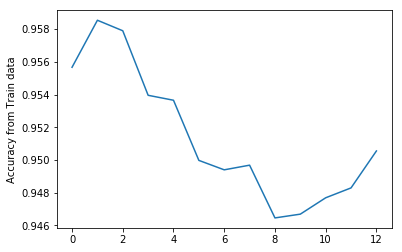

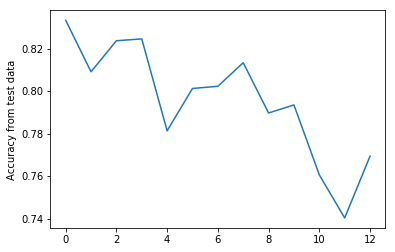

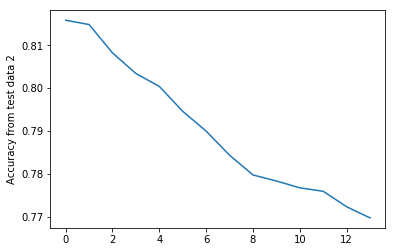

In [13]:
plt.plot(acc_train)
plt.ylabel('Accuracy from Train data')
plt.show()

plt.plot(acc_test)
plt.ylabel('Accuracy from test data')
plt.show()

plt.plot(acc_test2)
plt.ylabel('Accuracy from test data 2')
plt.show()


In [14]:
len(X_train)

8237